YEAR     VERB    NOUN    NAME    PRONOUN ADJ     ADV     DET     PREP    CONJ    OTHER   TOTAL   Q-INDEX STATE  
[]


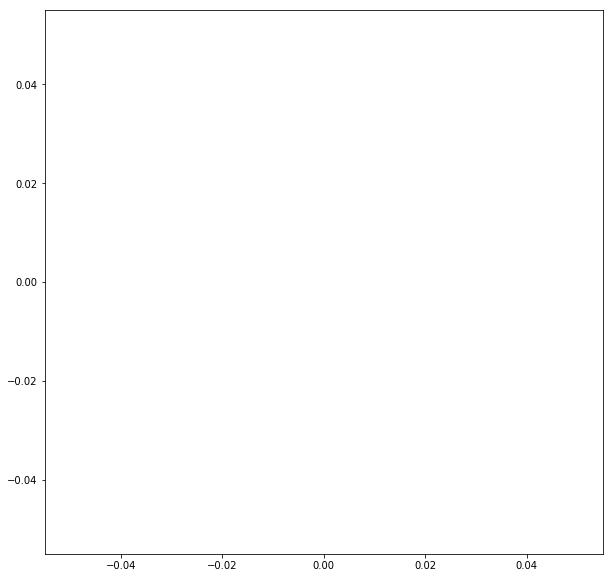

1952.txt 12.78   17.34   3.65    12.26   4.95    4.56    10.04   12.91   4.82    0.00    767.00  0.72    ACTIVE 
1953.txt 14.02   16.06   6.20    9.55    6.61    5.49    10.87   12.60   5.39    0.00    984.00  0.68    ACTIVE 
1954.txt 11.57   20.00   3.14    8.71    8.71    5.43    11.00   13.14   5.00    0.00    700.00  0.57    ACTIVE 
1955.txt 12.84   16.37   5.54    8.13    7.30    4.00    12.25   14.96   3.18    0.00    849.00  0.64    ACTIVE 
1956.txt 14.00   17.22   2.70    9.34    6.33    5.71    11.83   13.38   4.56    0.00    964.00  0.69    ACTIVE 
1957.txt 15.14   15.81   3.45    12.47   7.24    5.68    10.13   11.02   5.23    0.00    898.00  0.68    ACTIVE 
1958.txt 14.00   16.24   5.53    10.24   6.35    5.65    8.94    11.29   5.76    0.00    850.00  0.69    ACTIVE 
1959.txt 14.71   13.97   5.15    14.71   8.09    5.88    10.29   10.29   3.68    0.00    136.00  0.65    ACTIVE 
1960.txt 12.34   19.06   3.63    7.08    7.99    5.26    12.89   12.89   5.26    0.00    551.00 

In [19]:
#this code tabulates the proportion of each word type per speech 
#it also works out the q-index, this is proportion of verbs dividided by proportion of verbs + proportion of adjectives
#the higher the q-index, the more "action-based"; the lower, the more "descriptive"


from __future__ import division
import nltk
import os
import sys
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus.reader.plaintext import PlaintextCorpusReader


def POS_distribute(text, year, wordtype_list):
    pos_words = nltk.pos_tag(text)
    noun_count = 0
    name_count = 0
    pronoun_count = 0
    adjective_count = 0
    verb_count = 0
    adverb_count = 0
    determiner_count = 0
    preposition_count = 0
    conjunction_count = 0
    other_count = 0
    total_count = 0

    data = [year]


    for word in pos_words:

        total_count += 1

        if word[1] == 'VB' or word[1] == 'VBD' or word[1] == 'VBG' \
        or word[1] == 'VBN' or word[1] == 'VBP' or word[1] == 'VBZ':
            verb_count += 1

        if word[1] == 'NN' or word[1] == 'NNS':
            noun_count += 1

        if word[1] == 'NNP' or word[1] == 'NNPS':
            name_count += 1

        if word[1] == 'PRP' or word[1] == 'PRP$' or word[1] == 'WP' \
        or word[1] == 'WP$':
            pronoun_count += 1

        if word[1] == 'JJ' or word[1] == 'JJR' or word[1] == 'JJS':
            adjective_count += 1

        if word[1] == 'RB' or word[1] == 'RBR' or word[1] == 'RBS' \
        or word[1] == 'WRB':
            adverb_count += 1

        if word[1] == 'DT' or word[1] == 'PDT' or word[1] == 'WDT':
            determiner_count += 1

        if word[1] == 'IN':
            preposition_count += 1

        if word[1] == 'CC':
            conjunction_count += 1

    data.append(format(((verb_count/total_count)*100), '.2f'))

    data.append(format(((noun_count/total_count)*100), '.2f'))
  
    data.append(format(((name_count/total_count)*100), '.2f'))

    data.append(format(((pronoun_count/total_count)*100), '.2f')) 

    data.append(format(((adjective_count/total_count)*100), '.2f'))
   
    data.append(format(((adverb_count/total_count)*100), '.2f'))

    data.append(format(((determiner_count/total_count)*100), '.2f'))

    data.append(format(((preposition_count/total_count)*100), '.2f'))

    data.append(format(((conjunction_count/total_count)*100), '.2f'))
   
    data.append(format(((other_count/total_count)*100), '.2f'))
    
    data.append(format((total_count), '.2f'))


    verb_prop = (verb_count/total_count)*100
    adj_prop = (adjective_count/total_count)*100

    #q-index. verb prop dividided by verb+ad prop. higher results, more verbs 
    #q-index: proportion of verbs / proportion of verbs + adjectives (degree of action vs description)
    data.append(format((verb_prop/(verb_prop + adj_prop)), '.2f'))

    # ... more verbs than adjectives considered "active" txt
    if(verb_prop > adj_prop):
        data.append('ACTIVE')
    elif(verb_prop == adj_prop):
        data.append('NEUTRAL')
    elif(verb_prop < adj_prop):
        data.append('DESCRIPTIVE')



    return data


#later check the pronouns in more detail





def main():
    file_name = sys.argv[1]
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()

    print("{: <8} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7}".format('YEAR', 'VERB', 'NOUN', 'NAME', 'PRO\
NOUN', 'ADJ', 'ADV', 'DET', 'PREP', 'CONJ', 'OTHER', 'TOTAL', 'Q-INDEX', 'STATE'))

    #replace wordtype with whichever wordtype is of interest
    #in the above function, append that wordtype's proportion to the list
    #subsequently, can plot it on matplotlib... see the evolution of the proportion of 
    #said wordtype over the years 
    
    wordtype_list = []
    big_data = []
    for f in files:
        mini_data = (POS_distribute(nltk.word_tokenize(newcorpus.raw(f)), f, wordtype_list))
        big_data.append(mini_data)

    wordtype_list = [float(wordtype) for wordtype in wordtype_list]    
        
    print(wordtype_list)    
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(wordtype_list)    
    plt.show()

    for row in big_data:
        print("{: <8} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7} {: <7}".format(*row))


if __name__ == "__main__":
    main()

